# Appendix 2: Python code for Lloyds Algorithm 

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

## Implementing the Lloyds Algorithm

In [3]:
#Implementing the Llyods' algorithm
#Input: X - Data Matrix, K - No. of centers, tol - Tolerance level to be used
#Output: Y - K Centroids, C - Cluster assignment, D - Final distance value
def Llyods_Algo(X, K, tol):
    D_old = 0.
    Y = X[np.random.choice(X.shape[0], K, replace=False)]  # Initialize K random centroids  
    D_new, C = cluster_points(X, Y)      # Assign points in X to clusters
    while not if_converged(D_old, D_new, tol):
        D_old = D_new
        Y = compute_centroids(X, C, K)      # Recompute the centroids
        D_new, C = cluster_points(X, Y)      # Assign points in X to clusters
    return(Y, C, D_new)

$\textbf{Computing the Euclidean norm}$

In [4]:
#Function to compute the squared L-2 norm of the vector
def norm(vec):
    return sum(vec**2)

$\textbf{Function to cluster the points to the nearest centroid}$

In [5]:
# Function to cluster points to the nearest centroids 
# Input: X - Data Matrix, Y - Centroids 
# Output: Returns the total distance and the cluster assignments
def cluster_points(X, Y):
    #List for cluster assignments (C[i] = j meaning that i_th point gets assigned to the j_th centroid)
    C = []
    D = 0. #Total distance of each point from its nearest centroid 
    #We compute the distances of each point from all centroids and assign point to its nearest centroid 
    for x in X:
        dists=[norm(x-y) for y in Y]
        D+=np.sqrt(min(dists)) #Adding the square root euclidean distance from a point to its nearest centroid 
        C.append(np.argmin(dists)) #Assigning the point to its nearest centroid 
    D = D/X.shape[0] #Average Distance 
    return (D, C) #Returns the total distance and the cluster assignments 

$\textbf{Function to recompute the centroids}$

In [6]:
#Function to create the new centroids
# Input: X - Data Matrix, C - Clusters assignment, K - no. of centers 
# Output: Returns the new centroids Y
def compute_centroids(X, C, K):
    Y = np.zeros((K,X.shape[1])) # Y - K*d matrix of K new centroids 
    for i in range(K):
        points = [j for j in range(len(C)) if C[j]==i ]  #Collecting all the points corresponding to a particular centroid
        Y[i] = np.mean(X[points], axis=0) #Taking the mean of points corresponding to the centroid as the new centroid 
    return (Y)

$\textbf{Function to check if Llyods' algorithm has converged}$

In [7]:
#Function to check if Llyod's algorithm has converged using |D_{p+1} - D_p| < tolerance 
#Input: D_{p+1}, D_p (Sum of distances from each point to its nearest centroid before and after recomputing the centroids) &
#       tol - tolerance level to be used to decide convergence
#Output: 1 - Converged, 0 - Not converged
def if_converged(D_old, D_new, tol):
    converge = np.abs(D_new-D_old) < tol
    return converge

$\textbf{Visualizing the clusters and centroids}$

In [8]:
#Plotting the clusters and the centroids 
#Input: X - Data Matrix, Y - Centroids, C - Cluster assignment
def plot_clusters(X, Y, C):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=C)
    plt.plot(Y[:,0],Y[:,1], 'Xr', label = 'Centroids')
    plt.title('K Means Clustering for K = '+ str(len(Y)))
    plt.legend()
    plt.savefig('Results\K_means\Data2_tol2_'+ str(len(Y)))
    plt.show()

$\textbf{Data matrix and no. of centers as inputs from the user}$

In [9]:
def read_matrix(path):
    #X = pd.read_csv(input(),header=None)  
    X = np.genfromtxt(path, delimiter = ',', dtype=None) 
    # The file name for data matrix as an input from the user (Eg: Dataset 1/clustering.csv)
    return X

$\textbf{Setting the Tolerance values}$

In [10]:
#Tolerance Levels
tol1 = 1e-5 #Tolerance level (1)

'''
I chose tolerance to be the machine precision = 10^(-7) so that the clustering is 
continued until the error is below machine precision
'''
tol2 = 1e-7 #Tolerance level (2) = Single decimal Machine Precision


$\textbf{Iterating Lloyds algorithm for multiple initializations and selecting the best results}$

In [11]:
#Iterating LLyod's algorithm for multiple initializations
def Llyods_Algorithm_multiple(X, K, tol):
    trials = 10
    Dist = 100
    for i in range(trials):
        Y_try, C_try, Dist_try = Llyods_Algo(X, K, tol)
        if (Dist_try<Dist):
            Dist = Dist_try
            C = C_try
            Y = Y_try
    return Y, C, Dist

$\textbf{Function to get the plot between K values and Distance values D}$

In [12]:
#Elbow point in the plot for Average Distance versus K values
def D_Kplot(K_list, D_list):
    plt.plot(K_list, D_list, '*-b')
    plt.title('Plot of Distance versus K')
    plt.xlabel('K values')
    plt.ylabel(' Distortion values D')
    plt.show()

$\textbf{Function to plot Time complexity }$

In [13]:
#Time complexity for varying K values 
def time_complexity(K_list, time_list):
    plt.plot(K_list, time_list, '*-b')
    plt.title('Plot of Running Time versus K')
    plt.xlabel('K values')
    plt.ylabel(' Running time T')
    plt.show()

$\textbf{Testing on the datasets}$

In [22]:
#Dataset, Tolerance level
#Running it M no. of times and getting the best result
X = read_matrix(input('Enter the path for the dataset: '))
K = int(input('Enter the no. of clusters required: '))
start = time.clock()
Y, C, D = Llyods_Algorithm_multiple(X, K, tol1)
end = time.clock()
print ('Time', end - start)

Enter the path for the dataset: Dataset 1/clustering.csv
Enter the no. of clusters required: 2
Time 2.2587757037038045


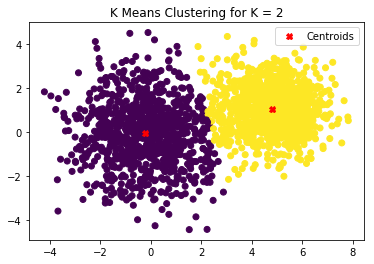

In [15]:
plot_clusters(X, Y, C)

In [16]:
#Dataset, Tolerance level
#Running it M no. of times and getting the best result
X = read_matrix(input('Enter the path for the dataset: '))
K = int(input('Enter the no. of clusters required: '))
Y, C, D = Llyods_Algorithm_multiple(X, K, tol1)

Enter the path for the dataset: Dataset_2/ShapedData.csv
Enter the no. of clusters required: 4


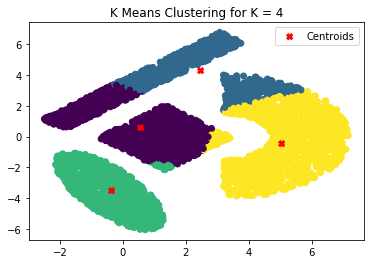

In [17]:
plot_clusters(X, Y, C)

In [23]:
#Plotting K versus D when run several times for diffrent K values 
#Plotting time complexity when run several times for diiferent K values 
K_list = list([2, 3, 4, 5, 6, 10])
D_list = []
time_list = [] #Time complexity over varying K 
for K in K_list:
    start = time.time()
    Y, C, D = Llyods_Algorithm_multiple(X, K, tol1)
    end = time.time()
    time_list.append(end - start)
    D_list.append(D)

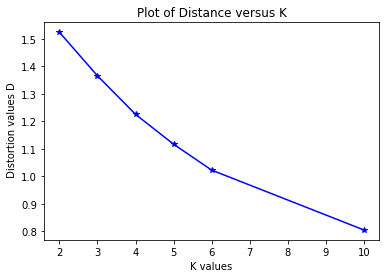

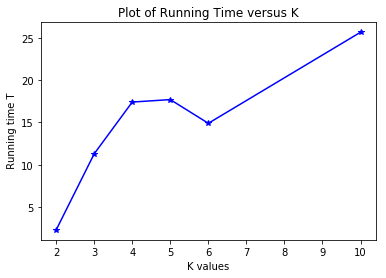

In [24]:
#Distance and K values plot
D_Kplot(K_list, D_list)

#Time versus K plot
time_complexity(K_list, time_list)